# Regression models: Week 2

Last week we discussed and visualized sample means and conditional means. Now its time to discuss the level of uncertainty of our measurement. For our sample mean we can calculate the **Standard error of mean*** (SEM) using the following formula:

$$SEM = \frac{sd(X)}{\sqrt{N}}$$

If we were to sample from population again and again and with each sample we'd store sample mean we might be able, after reasonable amount of iteration, to show the sampling distribution of the means. SEM in this case would be the standard deviation of this sampling distribution. 

In [3]:
library(dplyr)
set.seed(123) # setting seed for number generator  
N <- 10e6 # population size
popul_mean <- 5
y <- rnorm(N, popul_mean, 1) # sd = 1
popul <- tibble(y) 


n <- 100 # sample size
sample <- sample_n(popul, n)

In [4]:
SEM <- sd(sample$y) / sqrt(n)
round(SEM, 4)

[1] 0.1005

In [5]:
means <- tibble(idx = numeric(),
                mean = numeric()) # initialize means object to store means from samples

In [6]:
for (i in 1:500){
    sample <- sample_n(popul, n)
    means[i,1] <- i
    means[i,2] <- mean(sample$y)
    #print(i)
}

Now calculate the standard deviation of the all means:

In [7]:
# standard error of mean
SEM_simulated <- sd(means$mean)

round(SEM_simulated, 4)

[1] 0.0978

# Simple linear regression

First we are going to simulate our population regression function:

$$ y = \beta_0 + \beta_1 x + u, $$

where $\beta_0, \beta_1$ are the population parameters and $u$ is an *error term*. Both error term and population parameters are generally unknown (Unless we do a simulation, which we do...for now) and we need to estimate them. 

#### Simulating population:

In [8]:
set.seed(123)

N <- 1e4
x <- rnorm(N,0,1)
y <- 0.5 + 2.5*x + rnorm(N,0,3)
DF <- tibble(y,x)

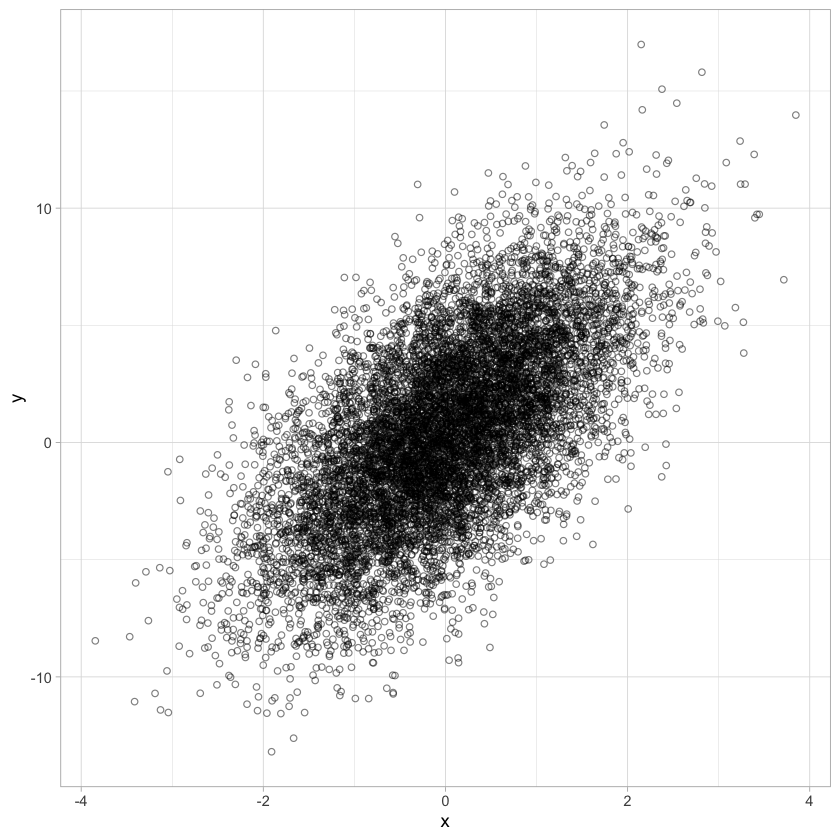

In [9]:
library(ggplot2)
DF %>% 
    ggplot(aes(x,y)) +
    geom_point(alpha=0.5, shape=1) +
    theme_light()

Thanks to the simulation we actually have the luxury to visualize the population regression function -- the population regression line:

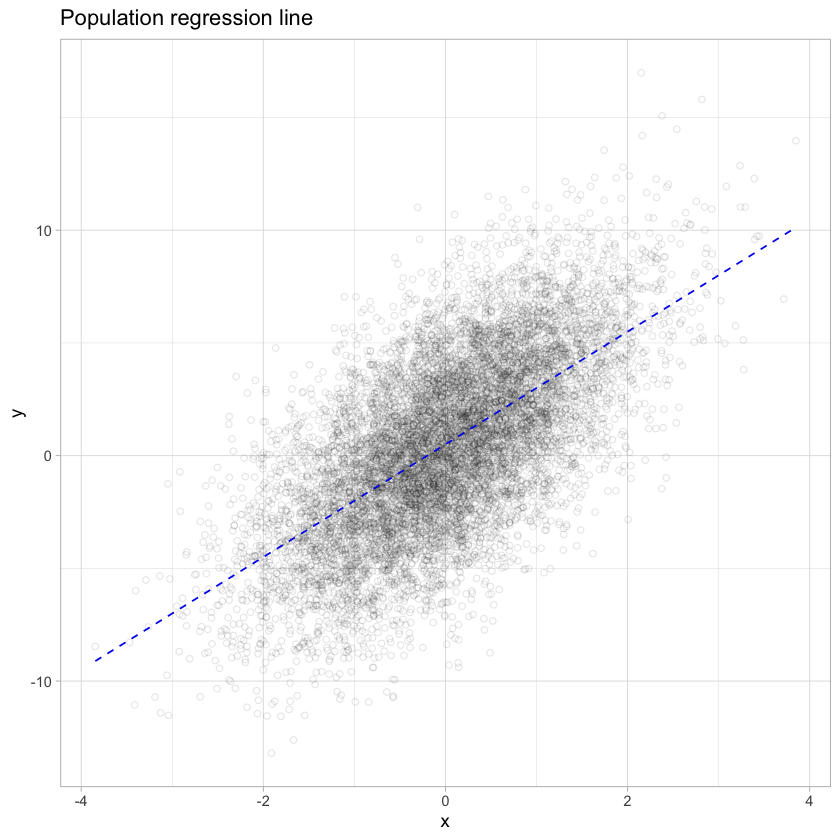

In [10]:
DF %>% 
    ggplot(aes(x,y))+
    geom_point(alpha=0.1, shape=1)+
    geom_function(fun= function(x) 0.5+2.5*x, color="blue2", linetype="dashed") + 
    labs(title = "Population regression line") + 
    theme_light()

#### Sampling from the population (the realistic part):

In [11]:
set.seed(123)
sample <- DF %>%
  sample_n(100)

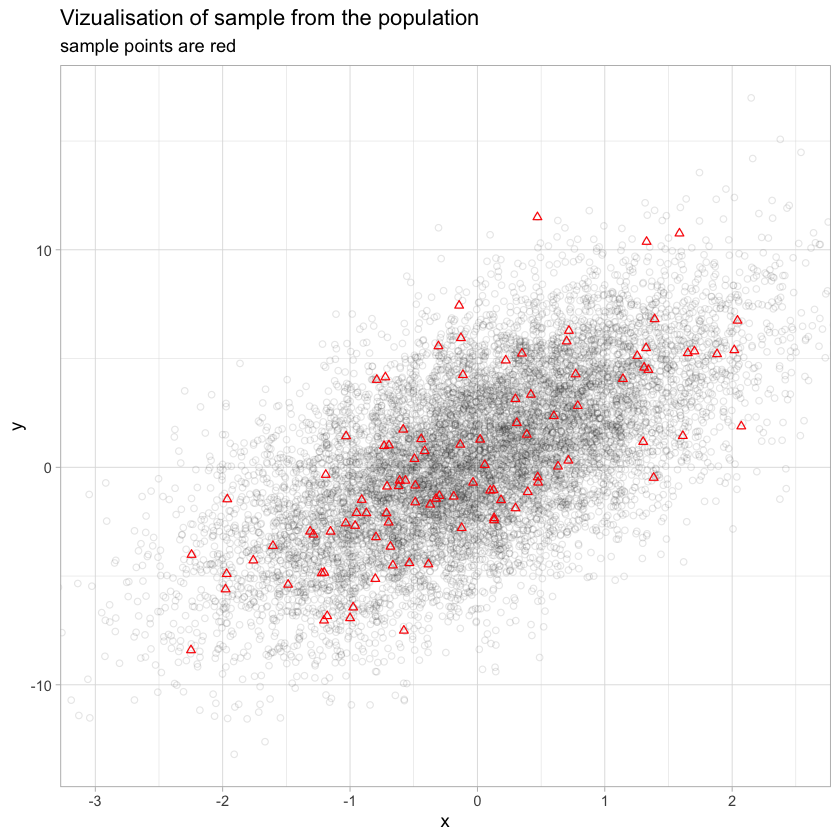

In [12]:
ggplot(DF, aes(x,y))+
    geom_point(alpha=0.1,shape=1)+
    geom_point(aes(x=x, y=y),color="red",data=sample,shape=2)+
    coord_cartesian(xlim=c(-3,2.5))+
    labs(title = "Vizualisation of sample from the population",
        subtitle = "sample points are red")+
    theme_light()

#### fitting the linear model using OLS

to estimate linear regression model using OLS use `lm()` function to create "lm" class object. Model results are accessed using `summary()` function:

In [13]:
model1 <- lm(y ~ x, sample)

In [14]:
summary(model1)


Call:
lm(formula = y ~ x, data = sample)

Residuals:
   Min     1Q Median     3Q    Max 
-6.377 -2.047 -0.083  1.408  9.544 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.5698     0.2970   1.918    0.058 .  
x             2.9445     0.2883  10.213   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.947 on 98 degrees of freedom
Multiple R-squared:  0.5156,	Adjusted R-squared:  0.5106 
F-statistic: 104.3 on 1 and 98 DF,  p-value: < 2.2e-16


In [15]:
stargazer::stargazer(model1, type="text", style = ) # try type = "latex" 


                        Dependent variable:    
                    ---------------------------
                                 y             
-----------------------------------------------
x                            2.945***          
                              (0.288)          
                                               
Constant                      0.570*           
                              (0.297)          
                                               
-----------------------------------------------
Observations                    100            
R2                             0.516           
Adjusted R2                    0.511           
Residual Std. Error       2.947 (df = 98)      
F Statistic           104.308*** (df = 1; 98)  
Note:               *p<0.1; **p<0.05; ***p<0.01


We can extract fitted values (estimated model line in case of simple linear regression) and resuduals from lm object and save them:

In [16]:
fitted <- model1$fitted.values

residuals <- model1$residuals

`geom_smooth()` using formula 'y ~ x'



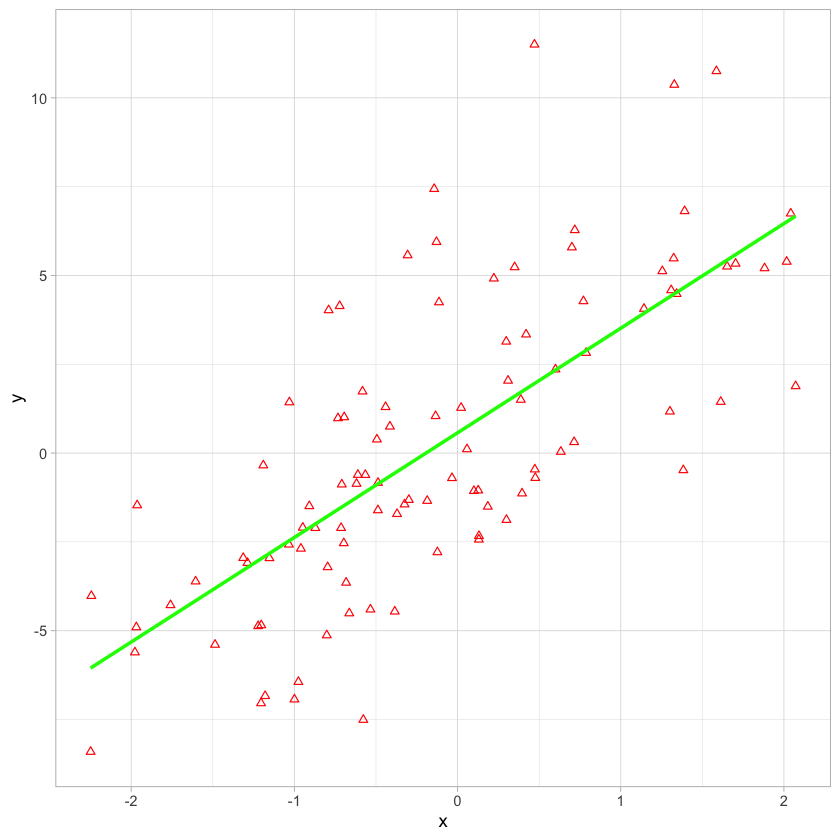

In [17]:
ggplot(data=sample, aes(x=x,y=y)) +
    geom_point(aes(x=x, y=y), colour="red", shape=2) +
    geom_smooth(method = "lm", colour="green", alpha=0.5,se=FALSE) +  
    theme_light()

This is the resulting estimated regression line with intercept $\hat{\beta_0}=0.57$ and a slope coefficient $\hat{\beta_1} = 2.945$

To visualize the residuals we need to add the fitted values as a new column to our sample:

In [18]:
sample <- sample %>%
    mutate(fitted_values = fitted)

And using `geom_segment()` we add the vertical lines for residuals:

`geom_smooth()` using formula 'y ~ x'



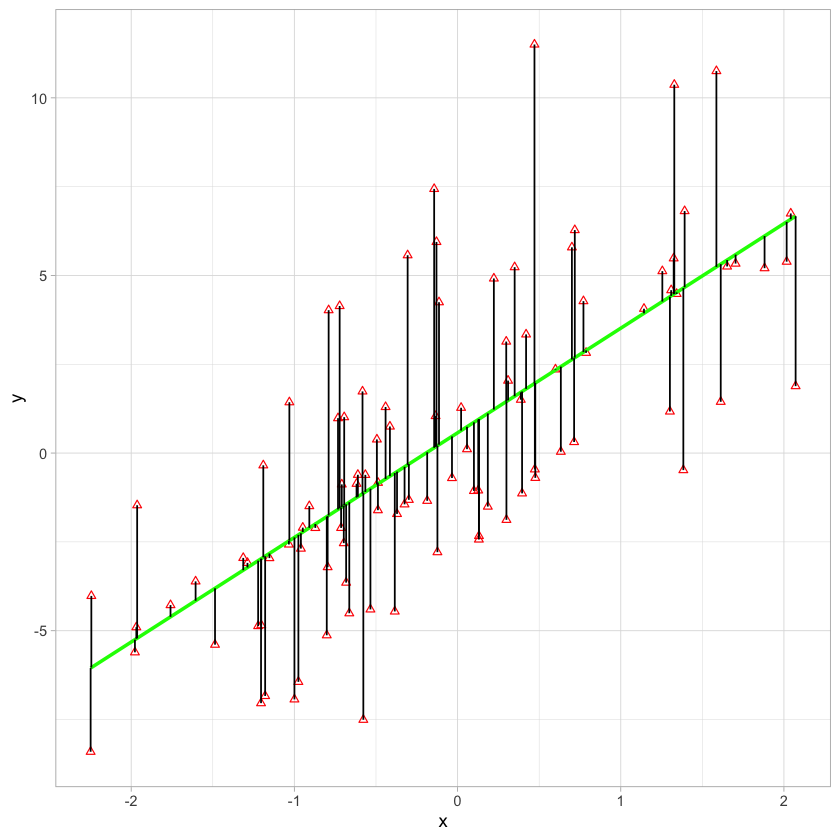

In [21]:
ggplot(data=sample, aes(x=x,y=y)) +
    geom_point(aes(x=x, y=y), colour="red", shape=2) +
    geom_smooth(method = "lm", colour="green", alpha=0.5,se=FALSE) +  
    geom_segment(aes(xend=x, yend=fitted)) +
    theme_light()

In this case, we estimate the model parameters using ordinary least squares (OLS). Visualization of perturbing $\beta_1$ parameter and its effect on the squared residuals:

![animation.gif](animation.gif)

# Logarithms and percentages:

The use of logarithms is closely connected to percentage representation. To see this, we will create a new variable simply called *Category* via `mutate()` function. This variable will contain a combination of variable *black* and *married*. The `case_when()` function allows us to encode the values based on the values of the original variables. Next we will group our data using `group_by()` based on the *category* and create means of wages for each category using `summarize()` function. 

The difference between the value is interpreted as *percentage difference*. Note that the difference is in geometric means!

In [22]:
6.835102 - 6.650079

[1] 0.185023

In [23]:
data %>%
    mutate(category = case_when(black==1 & married == 1 ~ "black_married",
                                black==1 & married == 0 ~ "black_single",
                                black==0 & married == 1 ~ "non_black_married",
                                black==0 & married == 0 ~ "non_black_single"),
        category = factor(category)) %>%
    mutate(l_wage = log(wage)) %>%
    group_by(category) %>%
    summarize(geometric_mean = exp(mean(lwage)),
             mean = mean(wage))

ERROR: Error in UseMethod("mutate"): no applicable method for 'mutate' applied to an object of class "function"


In [24]:
(929.9235 - 772.8453) / 772.8453 * 100

[1] 20.32466

In [25]:
(1007.2797 - 841.9756) / 841.9756 * 100

[1] 19.63288

### Simple linear regression 

The purpose of modelling is to figure out how are the things in the whole population. We take a *random* sample from the population. Imagine for now, that we can simulate our own population.